In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 读取两个CSV文件
mod_df = pd.read_csv('特征和密度结果_MODIS_MOD09GA_061_20241029_插值填充3.csv')
mcd_df = pd.read_csv('特征和密度结果_MODIS_MCD18C2_061_20241027_插值填充.csv')

# 重命名MCD数据框中的密度列,以区分来源
mcd_df = mcd_df.rename(columns={
    'density_mean': 'density_mean_mcd',
    'density_lower': 'density_lower_mcd', 
    'density_upper': 'density_upper_mcd'
})

# 重命名MOD数据框中的密度列
mod_df = mod_df.rename(columns={
    'density_mean': 'density_mean_mod',
    'density_lower': 'density_lower_mod',
    'density_upper': 'density_upper_mod'
})

# 合并两个数据框,以date为键
merged_df = pd.merge(mod_df, mcd_df, on='date')

# 计算两个来源的平均值作为最终密度值
merged_df['density_mean'] = merged_df['density_mean_mod']
merged_df['density_lower'] = merged_df['density_lower_mod']
merged_df['density_upper'] = merged_df['density_upper_mod']


In [5]:
pip install seaborn -i https://mirrors.aliyun.com/pypi/simple/

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras-tcn  -i https://mirrors.aliyun.com/pypi/simple/

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.



density_mean 与各特征的相关性排序:
GMT_0900_PAR: 0.2203
GMT_0000_PAR: 0.2000
FAI: 0.1746
ndvi: 0.1441
GMT_1200_PAR: nan
GMT_1500_PAR: nan
GMT_1800_PAR: nan
DAPAR: 0.1703
PPDI: 0.1611
PDVI: 0.1582
GMT_0300_PAR: 0.1424
GMT_0600_PAR: 0.1362
MPAR: 0.1105
nrfi: -0.1066
b7: -0.0695
b6: -0.0553
b1: -0.0462
b3: -0.0411
b4: -0.0400
b5: -0.0377
ndci: 0.0365
evi: -0.0298
b2: -0.0277
PAI: 0.0223
GMT_2100_PAR: 0.0047
APAR: 0.0047

density_lower 与各特征的相关性排序:
GMT_0900_PAR: 0.1934
GMT_0000_PAR: 0.1767
FAI: 0.1274
ndvi: 0.0962
GMT_1200_PAR: nan
GMT_1500_PAR: nan
GMT_1800_PAR: nan
PPDI: 0.1564
DAPAR: 0.1431
PDVI: 0.1348
GMT_0300_PAR: 0.1189
GMT_0600_PAR: 0.1076
MPAR: 0.0919
b7: -0.0618
b6: -0.0433
nrfi: -0.0394
evi: -0.0221
b5: -0.0175
ndci: 0.0142
b1: -0.0119
b3: -0.0101
PAI: 0.0081
b4: -0.0078
APAR: -0.0065
GMT_2100_PAR: -0.0065
b2: -0.0031

density_upper 与各特征的相关性排序:
GMT_0900_PAR: 0.2211
GMT_0000_PAR: 0.2007
FAI: 0.1888
ndvi: 0.1616
nrfi: -0.1363
GMT_1200_PAR: nan
GMT_1500_PAR: nan
GMT_1800_PAR: nan
DAPAR: 0.17

/tmp/ipykernel_16122/1750480707.py:36: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_16122/1750480707.py:36: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_16122/1750480707.py:36: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_16122/1750480707.py:36: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_16122/1750480707.py:36: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_16122/1750480707.py:36: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_16122/1750480707.py:36: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.

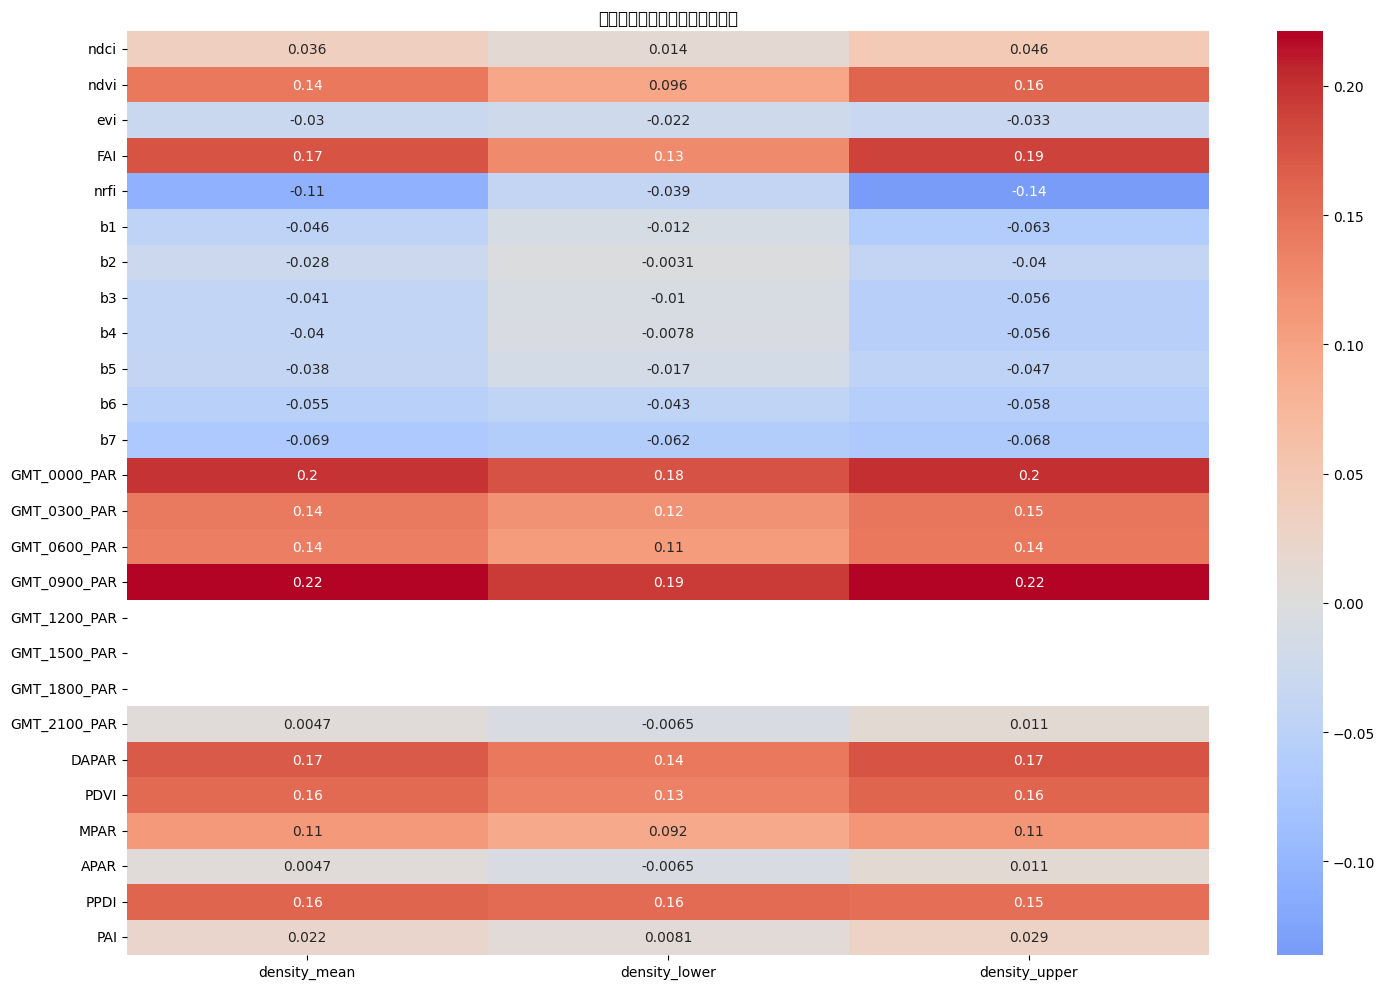

In [6]:
# 将日期列转换为datetime类型
merged_df['date'] = pd.to_datetime(merged_df['date'])

# 定义特征列
features = ['ndci', 'ndvi', 'evi', 'FAI', 'nrfi', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7',
           'GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR', 'GMT_1200_PAR',
           'GMT_1500_PAR', 'GMT_1800_PAR', 'GMT_2100_PAR', 'DAPAR', 'PDVI', 'MPAR', 'APAR',
           'PPDI', 'PAI']

# 定义目标变量
targets = ['density_mean', 'density_lower', 'density_upper']

# 计算特征和目标之间的相关性
correlations = {}
for target in targets:
    correlations[target] = {}
    for feature in features:
        corr = merged_df[feature].corr(merged_df[target])
        correlations[target][feature] = corr

# 为每个目标变量打印排序后的相关性
for target in targets:
    print(f"\n{target} 与各特征的相关性排序:")
    sorted_corr = sorted(correlations[target].items(), key=lambda x: abs(x[1]), reverse=True)
    for feature, corr in sorted_corr:
        print(f"{feature}: {corr:.4f}")

# 绘制热力图
import seaborn as sns
plt.figure(figsize=(15, 10))
corr_matrix = pd.DataFrame(index=features)
for target in targets:
    corr_matrix[target] = [correlations[target][feature] for feature in features]
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('特征与目标变量的相关性热力图')
plt.tight_layout()
plt.show()


In [4]:
# 将日期列转换为datetime类型
merged_df['date'] = pd.to_datetime(merged_df['date'])

# 定义特征列
features = ['ndci', 'ndvi', 'evi', 'FAI', 'nrfi', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7',
           'GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR', 'GMT_1200_PAR',
           'GMT_1500_PAR', 'GMT_1800_PAR', 'GMT_2100_PAR', 'DAPAR', 'PDVI', 'MPAR', 'APAR',
           'PPDI', 'PAI']

# 定义目标变量
targets = ['density_mean', 'density_lower', 'density_upper']

# 按日期划分训练集和测试集
train_df = merged_df[merged_df['date'] <= '2023-12-31']
test_df = merged_df[merged_df['date'] >= '2024-01-01']

# 准备序列数据
def create_sequences(data, features, seq_length=15):
    X, y = [], []
    feature_data = data[features].values
    target_data = data[targets].values
    
    for i in range(len(data) - seq_length):
        X.append(feature_data[i:(i + seq_length)])
        y.append(target_data[i + seq_length])
    return np.array(X), np.array(y)

# 准备训练集和测试集序列数据
seq_length = 15  # 15天的序列长度
X_train, y_train = create_sequences(train_df, features, seq_length)
X_test, y_test = create_sequences(test_df, features, seq_length)

# 导入必要的库
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LayerNormalization, Dropout, Dense, Input, Add, Activation
from tensorflow.keras.models import Model

def residual_block(x, dilation_rate, n_filters, kernel_size):
    # 残差分支
    r = Conv1D(n_filters, kernel_size, padding='causal', dilation_rate=dilation_rate)(x)
    r = LayerNormalization()(r)
    r = Activation('relu')(r)
    r = Dropout(0.2)(r)
    
    r = Conv1D(n_filters, kernel_size, padding='causal', dilation_rate=dilation_rate)(r)
    r = LayerNormalization()(r)
    r = Activation('relu')(r)
    r = Dropout(0.2)(r)
    
    # 如果输入和输出维度不同,使用1x1卷积进行调整
    if x.shape[-1] != n_filters:
        x = Conv1D(n_filters, 1, padding='same')(x)
        
    return Add()([x, r])

# 构建TCN模型
input_layer = Input(shape=(seq_length, len(features)))
x = input_layer

# TCN层
n_filters = 64
kernel_size = 3
dilations = [1, 2, 4, 8, 16, 32]

for d in dilations:
    x = residual_block(x, d, n_filters, kernel_size)

# 只取最后一个时间步
x = tf.keras.layers.Lambda(lambda x: x[:, -1, :])(x)

# 输出层
output_layer = Dense(3)(x)

# 创建模型
model = Model(inputs=input_layer, outputs=output_layer)

# 编译模型
model.compile(
    optimizer='adam',
    loss='mse'
)

# 训练模型
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 预测
predictions = model.predict(X_test)
y_mean_pred = predictions[:, 0]
y_lower_pred = predictions[:, 1] 
y_upper_pred = predictions[:, 2]


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - loss: 3403024189882368.0000 - val_loss: 246410226171904.0000
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 253268970176512.0000 - val_loss: 219748126162944.0000
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 248806448824320.0000 - val_loss: 213896468103168.0000
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 217339924578304.0000 - val_loss: 213112871452672.0000
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 236562268815360.0000 - val_loss: 243189386575872.0000
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 238092921339904.0000 - val_loss: 201509430099968.0000
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 185674640654336.0000 - val_loss: 200663539646464.0000
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 202662075170816.0000 - val_loss: 216872662335488.0000
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 186063435857920.0000 - val_loss: 


R2 分数:
平均密度: -4.6136
下限密度: -3.3174
上限密度: -7.4234


/tmp/ipykernel_8799/891806621.py:38: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8799/891806621.py:38: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8799/891806621.py:38: UserWarning: Glyph 34299 (\N{CJK UNIFIED IDEOGRAPH-85FB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8799/891806621.py:38: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8799/891806621.py:38: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8799/891806621.py:38: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8799/891806621.py:38: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  plt.tight_layout()

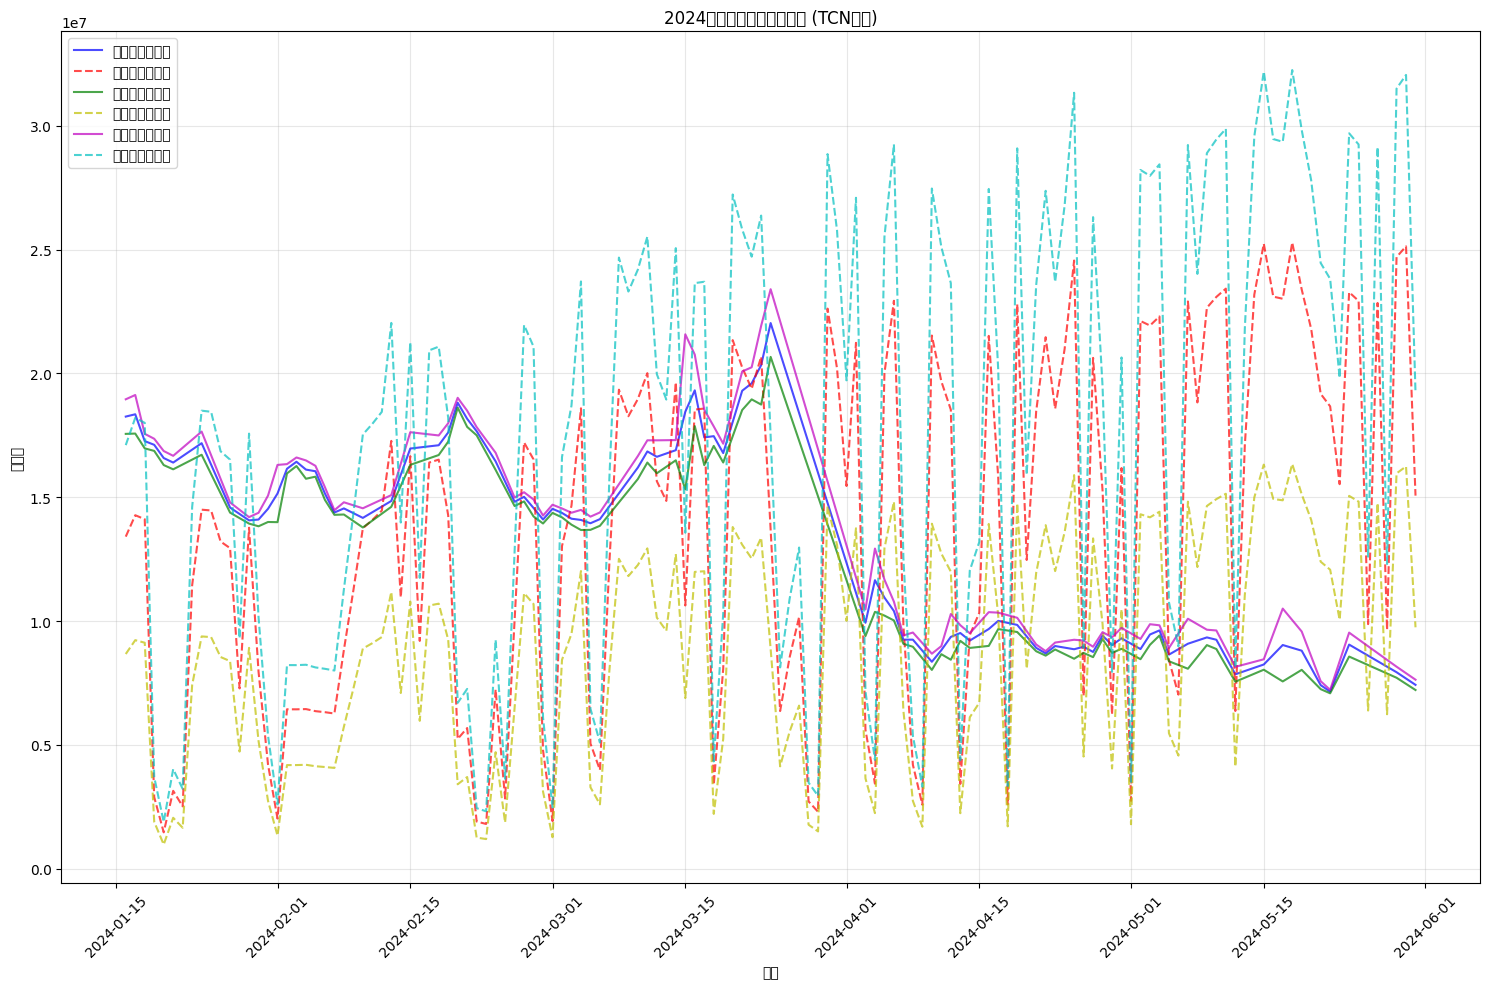

In [5]:

# 计算R2分数
r2_mean = r2_score(y_test[:, 0], y_mean_pred)
r2_lower = r2_score(y_test[:, 1], y_lower_pred)
r2_upper = r2_score(y_test[:, 2], y_upper_pred)

print("\nR2 分数:")
print(f"平均密度: {r2_mean:.4f}")
print(f"下限密度: {r2_lower:.4f}")
print(f"上限密度: {r2_upper:.4f}")

# 绘制测试集的预测结果
plt.figure(figsize=(15, 10))

# 调整日期索引以匹配序列预测结果
test_dates = test_df['date'].iloc[seq_length:]

# 绘制实际值和预测值
plt.plot(test_dates, y_test[:, 0], 'b-', label='平均密度实际值', alpha=0.7)
plt.plot(test_dates, y_mean_pred, 'r--', label='平均密度预测值', alpha=0.7)
plt.plot(test_dates, y_test[:, 1], 'g-', label='下限密度实际值', alpha=0.7)
plt.plot(test_dates, y_lower_pred, 'y--', label='下限密度预测值', alpha=0.7)
plt.plot(test_dates, y_test[:, 2], 'm-', label='上限密度实际值', alpha=0.7)
plt.plot(test_dates, y_upper_pred, 'c--', label='上限密度预测值', alpha=0.7)

# 添加标题和标签
plt.title('2024年藻密度预测结果对比 (TCN模型)')
plt.xlabel('日期')
plt.ylabel('藻密度')
plt.legend()

# 旋转x轴日期标签以提高可读性
plt.xticks(rotation=45)

# 显示网格
plt.grid(True, alpha=0.3)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()